# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-conicas_basico.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos de Cónicas Básico

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Cónicas de Apolonio

Un interactivo de la cónica de Apolonio:

In [21]:
from ipywidgets import interact

@interact(eta=(-2,2,0.1))
def conicas_apolonio(eta=-0.5):

    #Escala
    L=10.0
    #Forma
    eta=float(eta)
    
    #Máximo valor de x
    xamax=L/abs(eta) if abs(eta)>0 else L
    
    #Valores de x en los que graficaremos
    from numpy import sqrt,linspace
    xas=linspace(0,xamax,100)

    #Ecuaciones de las cónicas referidas al apside
    from numpy import append
    yas_par=sqrt(L*xas)
    yas=sqrt(L*xas+float(eta)*xas**2)

    #Gráfica
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(6,6))
    ax=fig.gca()

    ax.plot(xas,yas_par,'k--')
    ax.plot(xas,-yas_par,'k--')
    ax.plot(xas,yas,'b')
    ax.plot(xas,-yas,'b')

    #Decoración
    ax.grid()
    ax.set_title(f"Cónica con $L = {L}$, $\eta={eta}$")
    
    #Ejes proporcionales
    ax.axis('equal')

    plt.show()

interactive(children=(FloatSlider(value=-0.5, description='eta', max=2.0, min=-2.0), Output()), _dom_classes=(…

### La elipse

Un interactivo de la elipse y sus propiedades:

In [25]:
from ipywidgets import interact

@interact(e=(1e-3,1,0.1))
def elipse_centro(e=0.5):

    #Semieje mayor
    a=10.0

    #Forma
    e=float(e)
    
    #Semieje menor
    from numpy import sqrt
    b=a*sqrt(1-e**2)
    
    #Distancia foco-centro
    c=a*e
    
    #Máximo valor de x
    xcmax=a
    
    #Valores de x en los que graficaremos
    from numpy import linspace
    xcs=linspace(-a,a,100)

    #Ecuaciones de las cónicas referidas al apside
    from numpy import append
    ycs_cir=a*sqrt(1-xcs**2/a**2)
    ycs=b*sqrt(1-xcs**2/a**2)

    #Gráfica
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(6,6))
    ax=fig.gca()

    ax.plot(xcs,ycs_cir,'k--')
    ax.plot(xcs,-ycs_cir,'k--')
    ax.plot(xcs,ycs,'r')
    ax.plot(xcs,-ycs,'r')
    
    #Graficar la posición del foco y el centro
    ax.plot([-c],[0],'bx',markersize=10)
    ax.plot([0],[0],'ko',markersize=5)

    #Decoración
    ax.grid()
    ax.set_title(f"Elipse con $a = {a}$, $e={e}$")
    
    #Fijamos la misma escala en los ejes
    ax.axis('equal')

    plt.show()

interactive(children=(FloatSlider(value=0.5, description='e', max=1.0, min=0.001), Output()), _dom_classes=('w…

### La hipérbola

In [26]:
from ipywidgets import interact

@interact(e=(1,3,0.1))
def hiperbola_centro(e=1.5):

    #Semieje mayor
    a=-10.0

    #Forma
    e=float(e)
    
    #Semieje menor
    from numpy import sqrt
    beta=abs(a)*sqrt(e**2-1)
    
    #Semilatus rectum
    p=a*(1-e**2)
    
    #Posición del foco
    q=p/(1+e)
    F=abs(a)+q
    
    #Máximo valor de x
    xcmax=3*abs(a)
    
    #Valores de x en los que graficaremos
    from numpy import linspace
    xcs=linspace(abs(a),xcmax,100)

    #Ecuaciones de las cónicas referidas al apside
    from numpy import append
    ycs=beta*sqrt(xcs**2/a**2-1)

    #Ecuación de las asintotas
    xas=linspace(0,xcmax,100)
    ycs_asi=beta*xas/abs(a)
    
    #Gráfica
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(6,6))
    ax=fig.gca()

    ax.plot(xas,ycs_asi,'k--')
    ax.plot(xas,-ycs_asi,'k--')
    ax.plot(xcs,ycs,'r')
    ax.plot(xcs,-ycs,'r')
    
    #Graficar la posición del foco y el vértice
    ax.plot([F],[0],'bx',markersize=10)
    ax.plot([0],[0],'ko',markersize=5)


    #Decoración
    ax.grid()
    ax.set_title(f"Hipérbola con $a = {a}$, $e={e}$")
    
    #Fijamos la misma escala en los ejes
    ax.axis('equal')   
    plt.show()

interactive(children=(FloatSlider(value=1.5, description='e', max=3.0, min=1.0), Output()), _dom_classes=('wid…

### Rotación de las cónicas en el plano

Rutina de cálculo de la matriz de rotación:

In [27]:
from spiceypy import rotate
from numpy import pi
Rz=rotate(27*pi/180,2)

print(f"Rz(30 grados) = \n{Rz}")

Rz(30 grados) = 
[[ 0.89100652  0.         -0.4539905 ]
 [ 0.          1.          0.        ]
 [ 0.4539905   0.          0.89100652]]


Una rutina para rotar puntos:

In [33]:
def rota_puntos(R,x,y,z):
    from spiceypy import mxv
    from numpy import zeros_like
    N=len(x)
    xp=zeros_like(x)
    yp=zeros_like(y)
    zp=zeros_like(z)
    for i in range(N):
        xp[i],yp[i],zp[i]=mxv(R,[x[i],y[i],z[i]])
    return xp,yp,zp

Una cónica rotada:

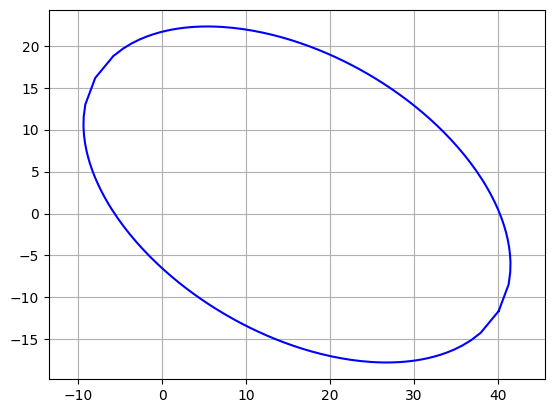

In [40]:
#Parámetros de la cónica
p=10.0
e=0.8

#Parametro eta
eta=e**2-1

#Conjunto de valores de x de la cónica
from numpy import linspace
if e==1:
    a=p
else:
    a=p/(1-e**2)

#Rango de valores de x
xs=linspace(0,2*abs(a),100)

#Ecuación de la cónica
from numpy import sqrt
ys_sup=sqrt(2*p*xs+eta*xs**2)
ys_inf=-sqrt(2*p*xs+eta*xs**2)

#Juntamos las dos ramas
from numpy import append,zeros_like
xs=append(xs[::-1],xs)
ys=append(ys_sup[::-1],ys_inf)
zs=zeros_like(xs)

#Parámetros de la traslación
tx=15.0
ty=-10.0

#Coordenadas trasladadas
xs=xs-tx
ys=ys-ty

# Rotamos los puntos
from spiceypy import rotate
from numpy import pi
teta=pi/6
Rz=rotate(teta,3)
xps,yps,zps=rota_puntos(Rz,xs,ys,zs)

#Graficamos
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
ax.plot(xps,yps,'b-')

ax.axis('equal')
ax.grid()

Calculando los coeficientes del polinomio general de la cónica:

In [41]:
from numpy import sin,cos
A=1-e**2*cos(teta)**2
B=e**2*sin(2*teta)
C=1-e**2*sin(teta)**2
D=2*ty*sin(teta)-2*p*cos(teta)+2*tx*cos(teta)*(1-e**2)
E=2*ty*cos(teta)+2*p*sin(teta)-2*tx*sin(teta)*(1-e**2)
F=tx**2*(1-e**2)-2*p*tx+ty**2

print(f"A = {A}")
print(f"B = {B}")
print(f"C = {C}")
print(f"D = {D}")
print(f"E = {E}")
print(f"F = {F}")
print(f"Ecuación: ({A:.2g})x^2+({B:.2g})xy+({C:.2g})y^2+({D:.2g})x+({E:.2g})y+({F:.1f})=0")

A = 0.5199999999999998
B = 0.5542562584220408
C = 0.84
D = -17.967433714816835
E = -12.720508075688773
F = -119.00000000000003
Ecuación: (0.52)x^2+(0.55)xy+(0.84)y^2+(-18)x+(-13)y+(-119.0)=0


Polinomio de segundo grado:

In [42]:
def polinomio_segundo_grado(coeficientes,x,y):
    A,B,C,D,E,F=coeficientes
    P=A*x**2+B*x*y+C*y**2+D*x+E*y+F
    return P

Verificación de los coeficientes calculados:

In [43]:
coeficientes=A,B,C,D,E,F
Pxpsyps=polinomio_segundo_grado(coeficientes,xps,yps)

print(f"P(xps,yps):\n{Pxpsyps[:5]}...")

P(xps,yps):
[ 2.84217094e-14 -1.13686838e-13 -1.13686838e-13 -7.10542736e-14
 -5.68434189e-14]...


Otra verificación:

In [44]:
Psum=sum(abs(Pxpsyps))

print(f"Sum |P(xps,yps)| = {Psum}")

Sum |P(xps,yps)| = 1.1738165994756855e-11


Verificación del cálculo del ángulo:

In [45]:
#Parámetro de forma
eta_num=1-(A+C)

#Ángulo
from numpy import arctan,sin,cos
teta_num=0.5*arctan(B/(C-A))

#Desplazamiento vertical
ty_num=(D*sin(teta_num)+E*cos(teta_num))/2

from numpy import pi
print(f"eta original = {eta:g}, eta numérico = {eta_num:g}")
print(f"teta original = {teta*180/pi:g}, teta numérico = {teta_num*180/pi:g}")
print(f"ty original = {ty:g}, ty numérico = {ty_num:g}")

eta original = -0.36, eta numérico = -0.36
teta original = 30, teta numérico = 30
ty original = -10, ty numérico = -10


### Cónicas en coordenadas cilíndricas

El gráfico de la elipse calculada a partir de su ecuación en coordenadas cilíndicas es:

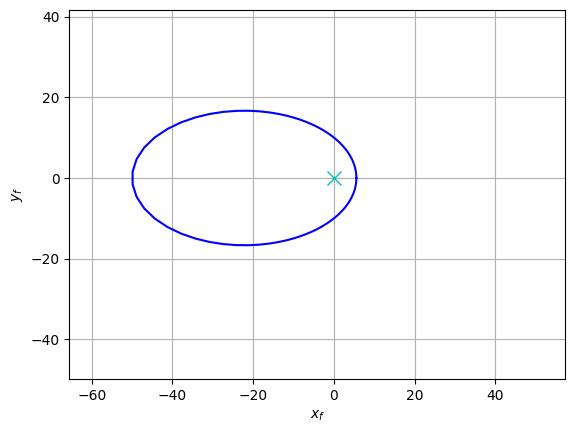

In [46]:
#Parámetros
p=10.0
e=0.8

#Valores del ángulo
from numpy import linspace,pi
fs=linspace(0,2*pi,100)

#Distancias 
from numpy import cos
rs=p/(1+e*cos(fs))

#Coordenadas
from numpy import sin
xs=rs*cos(fs)
ys=rs*sin(fs)

#Gráfica
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Puntos cónica
ax.plot(xs,ys,'b-')
#Foco
ax.plot([0],[0],'cx',markersize=10)

#Decoración
ax.set_xlabel(f"$x_f$")
ax.set_ylabel(f"$y_f$")
from pymcel.plot import fija_ejes_proporcionales
valores=(xs,ys),
fija_ejes_proporcionales(ax,valores);
ax.grid();

Un algoritmo general, que sirve para elipses, parábolas e hipérbolas sería:

In [47]:
def puntos_conica(p,e,df=0.1):

    #Compute fmin,fmax
    from numpy import pi
    if e<1:
        fmin=-pi
        fmax=pi
    elif e>1:
        from numpy import arccos
        psi=arccos(1/e)
        fmin=-pi+psi+df
        fmax=pi-psi-df
    else:
        fmin=-pi+df
        fmax=pi-df
            
    #Valores del ángulo
    from numpy import linspace,pi
    fs=linspace(fmin,fmax,500)

    #Distancias 
    from numpy import cos
    rs=p/(1+e*cos(fs))

    #Coordenadas
    from numpy import sin
    xs=rs*cos(fs)
    ys=rs*sin(fs)
    from numpy import zeros_like
    zs=zeros_like(xs)
    
    return xs,ys,zs

En la siguiente rutina/interactivo podemos graficar la cónica general en coordenadas cilíndricas:

In [49]:
from ipywidgets import interact

@interact(p=(1,10),e=(0,2,0.1))
def conica_cilindricas(p=1,e=1.5):
    
    #Genera puntos
    xs,ys,zs=puntos_conica(p,e)

    #Gráfica
    import matplotlib.pyplot as plt
    fig=plt.figure()
    ax=fig.gca()

    ax.plot(xs,ys,'b-')
    ax.plot([0],[0],'cx',markersize=10)

    #Decoración
    ax.set_xlabel(f"$x_f$")
    ax.set_ylabel(f"$y_f$")
    from pymcel.plot import fija_ejes_proporcionales
    valores=(xs,ys),
    fija_ejes_proporcionales(ax,valores);
    ax.grid()

interactive(children=(IntSlider(value=1, description='p', max=10, min=1), FloatSlider(value=1.5, description='…

### Anomalías

Relación entre la anomalía verdadera y la anomalía excéntrica para la elipse:

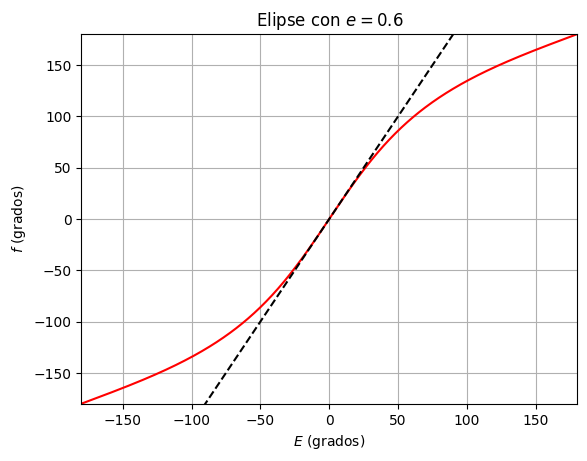

In [50]:
e=0.6

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

from numpy import linspace,pi
Es=linspace(-pi,pi,500)

from numpy import arctan,tan,sqrt
fe=sqrt((1+e)/(1-e))
fs=2*arctan(fe*tan(Es/2))

ax.plot(Es*180/pi,fs*180/pi,'r-');

#Aproximación lineal
Els=linspace(-pi,pi,100)
ax.plot(Els*180/pi,fe*Els*180/pi,'k--');

#Decoración
ax.grid();
ax.set_xlabel("$E$ (grados)");
ax.set_ylabel("$f$ (grados)");
ax.set_title(f"Elipse con $e={e}$");
ax.set_xlim((-180,180));
ax.set_ylim((-180,180));

Relación entre la anomalía verdadera y la anomalía excéntrica para la hipérbola:

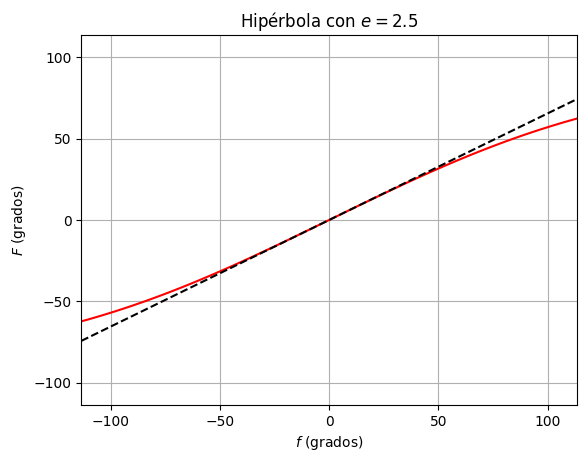

In [52]:
e=2.5

#Valor extremo de la anomalía verdadera
from numpy import arccos
psi=arccos(1/e)
fmax=pi-psi

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Valores de la anomalía verdadera
from numpy import linspace,pi
fs=linspace(-fmax,fmax,100)

#Relación
from numpy import arctanh,tanh,sqrt
fe=sqrt((e-1)/(e+1))
Fs=2*arctanh(fe*tanh(fs/2))

#Gráfico de la relación
ax.plot(fs*180/pi,Fs*180/pi,'r-');

#Aproximación lineal
fls=linspace(-fmax,fmax,100)
ax.plot(fls*180/pi,fe*fls*180/pi,'k--');

#Decoración
ax.grid();
ax.set_xlabel("$f$ (grados)");
ax.set_ylabel("$F$ (grados)");
ax.set_title(f"Hipérbola con $e={e}$");
ax.set_xlim((-fmax*180/pi,fmax*180/pi));
ax.set_ylim((-fmax*180/pi,fmax*180/pi));

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)